In [1]:
import pandas as pd
pd.set_option("display.max_columns",50)


In [2]:
df = pd.read_csv('complaints.csv')
df.head()

/tmp/ipykernel_10755/638734534.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-14,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,SYNCHRONY FINANCIAL,CA,92311,NaN,NaN,Web,2023-08-14,In progress,Yes,NaN,7400955
1,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",TN,38116,NaN,NaN,Web,2023-08-23,Closed with non-monetary relief,Yes,NaN,7442979
2,2023-09-27,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",IL,60018,NaN,NaN,Web,2023-09-27,In progress,Yes,NaN,7610573
3,2023-09-27,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",FL,33186,NaN,NaN,Web,2023-09-27,In progress,Yes,NaN,7610574
4,2023-09-27,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"EQUIFAX, INC.",TN,38116,NaN,NaN,Web,2023-09-27,In progress,Yes,NaN,7610575


Date received	The date the CFPB received the complaint

Product	The type of product the consumer identified in the complaint

Sub-product	The type of sub-product the consumer identified in the complaint

Issue	The issue the consumer identified in the complaint

Sub-issue	The sub-issue the consumer identified in the complaint

Consumer complaint narrative	Consumer complaint narrative is the consumer-submitted description of "what happened" from the complaint. Consumers must opt-in to share their narrative. We will not publish the narrative unless the consumer consents, and consumers can opt-out at any time. The CFPB takes reasonable steps to scrub personal information from each complaint that could be used to identify the consumer.

Company public response	The company's optional, public-facing response to a consumer's complaint. Companies can choose to select a response from a pre-set list of options that will be posted on the public database. For example, "Company believes complaint is the result of an isolated error."

Company	The complaint is about this company

State	The state of the mailing address provided by the consumer

ZIP code	The mailing ZIP code provided by the consumer

Tags	Data that supports easier searching and sorting of complaints submitted by or on behalf of consumers.

For example, complaints where the submitter reports the age of the consumer as 62 years or older are tagged, ‘Older American.’ Complaints submitted by or on behalf of a servicemember or the spouse or dependent of a servicemember are tagged, ‘Servicemember.’ Servicemember includes anyone who is active duty, National Guard, or Reservist, as well as anyone who previously served and is a Veteran or retiree.

Consumer coConsumer disputed?	Whether the consumer disputed the company’s responsensent provided?	Identifies whether the consumer opted in to publish their complaint narrative. We do not publish the narrative unless the consumer consents and consumers can opt-out at any time.

Submitted via	How the complaint was submitted to the CFPB

Date sent to company	The date the CFPB sent the complaint to the company

Company response to consumer	This is how the company responded. For example, "Closed with explanation."

Timely response?	Whether the company gave a timely response

Complaint ID	The unique identification number for a complaint

In [3]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [4]:
columns_mapped = {
    'Date received':'Date_received',
    'Consumer complaint narrative':'Consumer_complaint_narrative',
    'Company public response':'Company_public_response',
    'ZIP code':'ZIP_code',
    'Consumer consent provided?':'consumer_consent_provided',
    'Submitted via':'Submitted_via',
    'Date sent to company':'Date_sent_to_company', 
    'Company response to consumer':'Company_response_to_consumer',
    'Timely response?':'Timely_response', 
    'Consumer disputed?':'Consumer_disputed', 
    'Complaint ID':'Complaint_ID'
    }
df.rename(columns=columns_mapped,inplace=True)


In [5]:
file_path = 'complaints.parquet'
df.to_parquet(file_path)


In [6]:
data = pd.read_parquet('complaints.parquet')
data.head()

,Date_received,Product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,Tags,consumer_consent_provided,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID
0,2023-08-14,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt is not yours,None,None,SYNCHRONY FINANCIAL,CA,92311,None,None,Web,2023-08-14,In progress,Yes,None,7400955
1,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,None,None,"EQUIFAX, INC.",TN,38116,None,None,Web,2023-08-23,Closed with non-monetary relief,Yes,None,7442979
2,2023-09-27,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,None,None,"EQUIFAX, INC.",IL,60018,None,None,Web,2023-09-27,In progress,Yes,None,7610573
3,2023-09-27,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,None,None,"EQUIFAX, INC.",FL,33186,None,None,Web,2023-09-27,In progress,Yes,None,7610574
4,2023-09-27,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,None,None,"EQUIFAX, INC.",TN,38116,None,None,Web,2023-09-27,In progress,Yes,None,7610575


In [7]:
data.columns

Index(['Date_received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer_complaint_narrative', 'Company_public_response', 'Company',
       'State', 'ZIP_code', 'Tags', 'consumer_consent_provided',
       'Submitted_via', 'Date_sent_to_company', 'Company_response_to_consumer',
       'Timely_response', 'Consumer_disputed', 'Complaint_ID'],
      dtype='object')

unique feature in target columns in percentage

In [9]:
data.Consumer_disputed.value_counts(normalize=True)*100

Consumer_disputed
No     80.68895
Yes    19.31105
Name: proportion, dtype: float64

shape of the dataset

In [ ]:
data.shape

(4118869, 18)

since this is text data some rows could have just '' we can replace them with np.NAN 

In [ ]:
import numpy as np
data.replace('',np.nan,inplace=True)

summary of the data

In [ ]:
data.describe(include='object').T

,count,unique,top,freq
Date_received,4118869,4317,2023-08-08,5183
Product,4118869,21,"Credit reporting, credit repair services, or o...",2166089
Sub-product,3883578,86,Credit reporting,2232191
Issue,4118869,177,Incorrect information on your report,1078953
Sub-issue,3401596,268,Information belongs to someone else,709110
Consumer_complaint_narrative,1493344,1261353,My name is XXXX XXXX this complaint is not mad...,2228
Company_public_response,1911386,11,Company has responded to the consumer and the ...,1682263
Company,4118869,6962,"EQUIFAX, INC.",790155
State,4075613,63,CA,480549
ZIP_code,4088656,33098,XXXXX,102226


check data type of the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4118869 entries, 0 to 4118868
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date_received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer_complaint_narrative  object
 6   Company_public_response       object
 7   Company                       object
 8   State                         object
 9   ZIP_code                      object
 10  Tags                          object
 11  consumer_consent_provided     object
 12  Submitted_via                 object
 13  Date_sent_to_company          object
 14  Company_response_to_consumer  object
 15  Timely_response               object
 16  Consumer_disputed             object
 17  Complaint_ID                  int64 
dtypes: int64(1), object(17)
memory usage: 565.

In [ ]:
numerical_feature  = [feature for feature in data.columns if data[feature].dtypes!='O']
numerical_feature

['Complaint_ID']

In [ ]:
categorical_feature  = [feature for feature in data.columns if data[feature].dtypes=='O']
categorical_feature

['Date_received',
 'Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'Consumer_complaint_narrative',
 'Company_public_response',
 'Company',
 'State',
 'ZIP_code',
 'Tags',
 'consumer_consent_provided',
 'Submitted_via',
 'Date_sent_to_company',
 'Company_response_to_consumer',
 'Timely_response',
 'Consumer_disputed']

In [ ]:
null_values = data.isnull().sum().div(data.shape[0]).mul(100).to_frame().sort_values(0,ascending=False)
null_values

,0
Tags,89.596489
Consumer_disputed,81.345413
Consumer_complaint_narrative,63.743834
Company_public_response,53.594397
consumer_consent_provided,21.896375
Sub-issue,17.414319
Sub-product,5.712515
State,1.050191
ZIP_code,0.733527
Company_response_to_consumer,0.000121


In [10]:
df['Consumer_disputed'].value_counts()

Consumer_disputed
No     619980
Yes    148378
Name: count, dtype: int64

we can see our dependent feature have 81.34% null feature and according to CFPB it is </br>
N/A: The Bureau discontinued the consumer dispute option on April 24, 2017.

If we drop the null rows also we still have 768358 rows which might be sufficient for training our model

In [ ]:
columns = ['Tags','Consumer_complaint_narrative','Company_public_response','Complaint_ID','ZIP_code','Sub-issue']
data.drop(columns,inplace=True,axis=1)

In [ ]:
data.head()

,Date_received,Product,Sub-product,Issue,Company,State,consumer_consent_provided,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed
0,2023-08-14,Debt collection,Credit card debt,Attempts to collect debt not owed,SYNCHRONY FINANCIAL,CA,None,Web,2023-08-14,In progress,Yes,None
1,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,"EQUIFAX, INC.",TN,None,Web,2023-08-23,Closed with non-monetary relief,Yes,None
2,2023-09-27,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,"EQUIFAX, INC.",IL,None,Web,2023-09-27,In progress,Yes,None
3,2023-09-27,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,"EQUIFAX, INC.",FL,None,Web,2023-09-27,In progress,Yes,None
4,2023-09-27,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,"EQUIFAX, INC.",TN,None,Web,2023-09-27,In progress,Yes,None


In [ ]:
for col in data.columns:
    print(col,data[col].nunique())

Date_received 4317
Product 21
Sub-product 86
Issue 177
Company 6962
State 63
consumer_consent_provided 4
Submitted_via 7
Date_sent_to_company 4266
Company_response_to_consumer 8
Timely_response 2
Consumer_disputed 2


Visualization of target columns

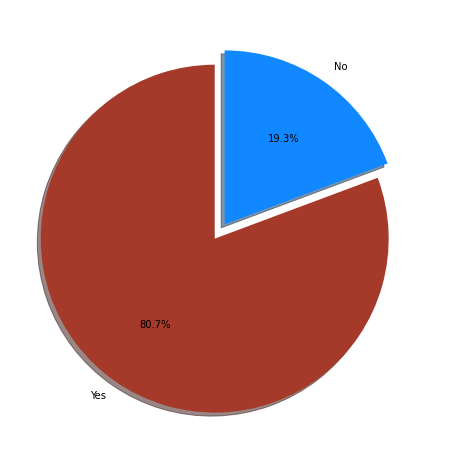

In [ ]:
import matplotlib.pyplot as plt

percentage = data['Consumer_disputed'].value_counts(normalize=True) * 100
labels = ['Yes', 'No']
explode = (0.1, 0)  # Explode the 'Yes' category (adjust the value as needed)

fig, ax = plt.subplots(figsize=(13, 8))
colors = ['#a63a2a', '#1188ff']
ax.pie(percentage, labels=labels, startangle=90,
       autopct='%1.1f%%', explode=explode, shadow=True, colors=colors)
plt.show()

From the chart it is clear that data is imbalanced


product on which complaint were made

From the chart it is clear that data is imbalanced
product on which complaint were made
The type of the product on which costumer made complaint

In [ ]:
data.columns

Index(['Date_received', 'Product', 'Sub-product', 'Issue', 'Company', 'State',
       'consumer_consent_provided', 'Submitted_via', 'Date_sent_to_company',
       'Company_response_to_consumer', 'Timely_response', 'Consumer_disputed'],
      dtype='object')

In [ ]:
product_percenatge = data['Product'].value_counts(normalize=True)*100
product_percenatge

Product
Credit reporting, credit repair services, or other personal consumer reports    52.589412
Debt collection                                                                 12.332220
Mortgage                                                                         9.335937
Credit card or prepaid card                                                      5.008511
Checking or savings account                                                      4.458141
Credit reporting                                                                 3.409407
Credit card                                                                      2.261155
Credit reporting or other personal consumer reports                              2.133110
Bank account or service                                                          2.092929
Student loan                                                                     1.869348
Money transfer, virtual currency, or money service                               1.433913
Ve

visualizint the data

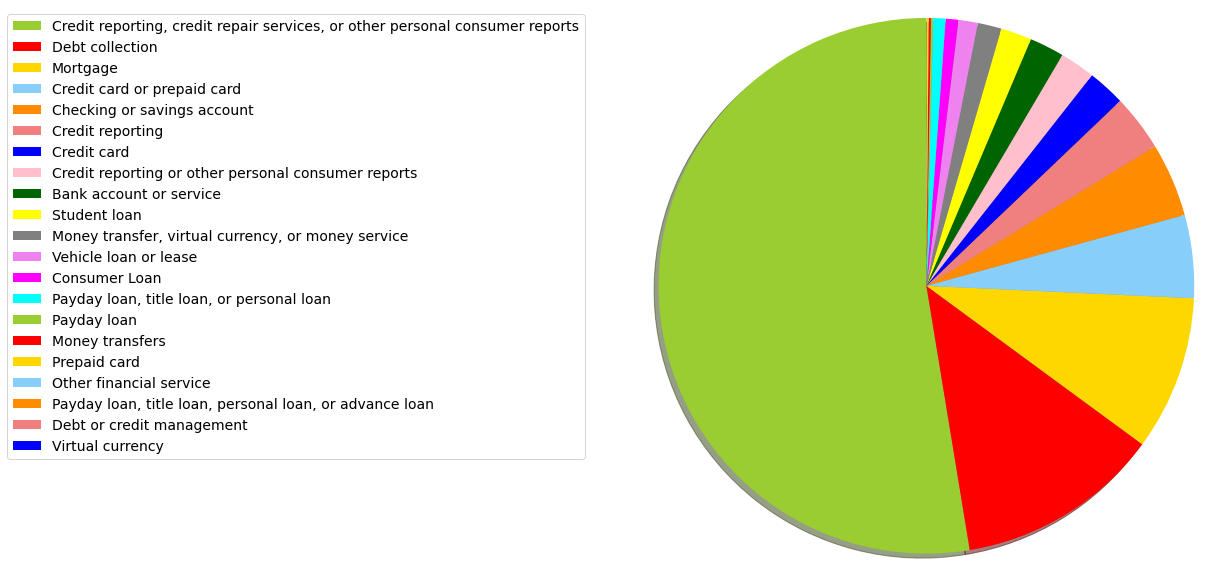

In [ ]:
product_labels = product_percenatge.index
colors = ['yellowgreen','red','gold','lightskyblue','darkorange','lightcoral','blue',
          'pink','darkgreen','yellow','grey','violet','magenta','cyan']
fig,ax = plt.subplots(figsize=(10,12))
patches,texts  = ax.pie(product_percenatge,startangle = 90, shadow=True,colors=colors,
                        radius=1.2)
plt.legend(patches,product_labels,loc='best',bbox_to_anchor=(-0.1,1.),fontsize=14)
plt.show()

States in  US and their impact on the target feature
  


The state of the mailing address provided by the consumers

In [ ]:
top_states = df.State.value_counts(normalize=True)[0:10]*100
top_states.to_frame()

,proportion
State,
CA,11.790840
FL,11.694928
TX,10.358785
GA,6.741440
NY,6.481921
PA,4.716591
IL,4.048593
NJ,3.398900
NC,3.314618


<Axes: xlabel='State'>

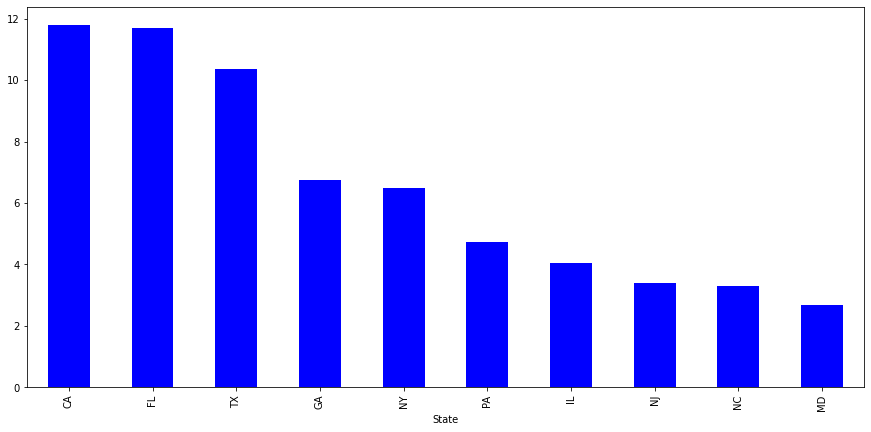

In [ ]:
plt.subplots(figsize=(15,7))
top_states.plot(kind='bar',color='blue')

Company's Response and its effect on Target feature

Company's Response and its effect on Target feature
The company's mandatory response for the particular complaint

In [ ]:
df.groupby('Company_response_to_consumer')['Consumer_disputed'].value_counts(normalize=True).to_frame()*100

proportion
Company_response_to_consumer    Consumer_disputed            
Closed                          No                  79.416274
                                Yes                 20.583726
Closed with explanation         No                  78.771353
                                Yes                 21.228647
Closed with monetary relief     No                  89.415405
                                Yes                 10.584595
Closed with non-monetary relief No                  88.370777
                                Yes                 11.629223
Closed with relief              No                  86.651584
                                Yes                 13.348416
Closed without relief           No                  73.074771
                                Yes                 26.925229
Untimely response               No                  99.928264
                                Yes                  0.071736

Proportion of consumer who has disputedd and company's responses

In [ ]:
disputed_df = df.loc[df.Consumer_disputed=='Yes']
disputed_df.Company_response_to_consumer.value_counts(normalize=True).to_frame()*100

,proportion
Company_response_to_consumer,
Closed with explanation,82.690830
Closed with non-monetary relief,7.479545
Closed with monetary relief,3.665638
Closed without relief,3.242394
Closed,2.443085
Closed with relief,0.477160
Untimely response,0.001348


Visualization

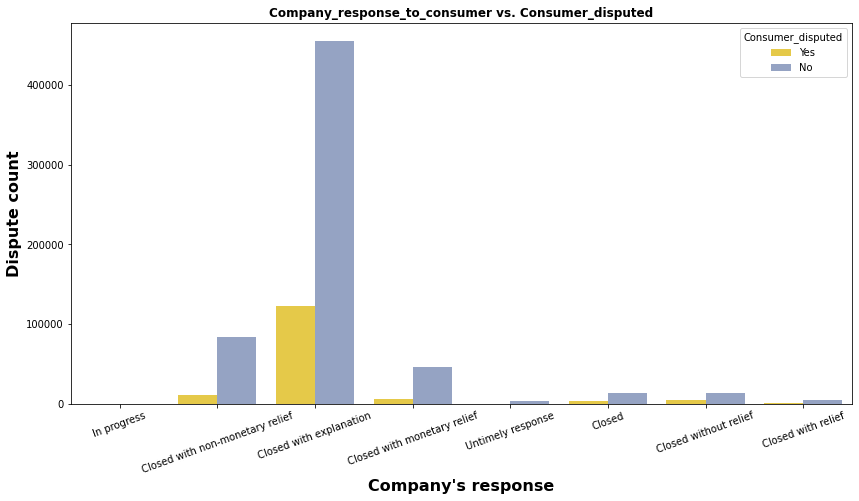

In [ ]:
import seaborn as sns
plt.subplots(figsize=(14, 7))
sns.countplot(x='Company_response_to_consumer', hue='Consumer_disputed', data=data, palette='Set2_r')
plt.title('Company_response_to_consumer vs. Consumer_disputed', weight="bold")
plt.ylabel('Dispute count', weight='bold', fontsize=16)
plt.xlabel("Company's response", weight='bold', fontsize=16)
plt.xticks(rotation=20)
plt.show()

Finance Complaint Year and Disputed Consumer's count

Finance Complaint Year and Disputed Consumer's countThe year when CFPB received the complaints

As this is the imbalanced data visualizing only the data inwhich consumer have dispute on the  company's response

In [ ]:
#create the copy of the dispute.consumer data
vis_df = disputed_df.copy()
vis_df['received_data'] = pd.to_datetime(vis_df['Date_received']).dt.date
vis_df['received_month'] = pd.to_datetime(vis_df['Date_received']).dt.month
vis_df['received_year'] = pd.to_datetime(vis_df['Date_received']).dt.year

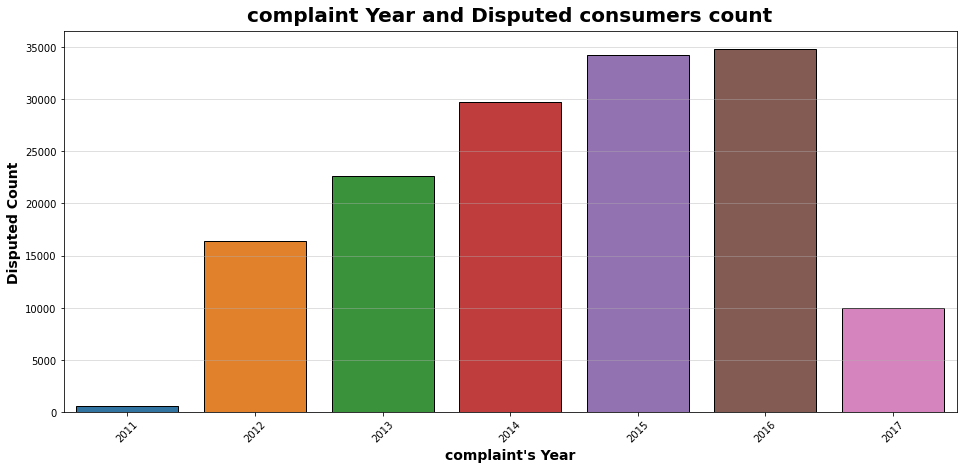

In [ ]:
plt.subplots(figsize=(16,7))
sns.countplot(x='received_year',data=vis_df,ec="black")
plt.xticks(rotation=45)
plt.title('complaint Year and Disputed consumers count',weight="bold",fontsize=20,pad=10)
plt.ylabel("Disputed Count",weight="bold",fontsize=14)
plt.xlabel("complaint's Year",weight="bold",fontsize=14)
plt.grid(alpha = 0.5,axis="y")
plt.show()

Finance Complaint Month and Dispted Consumer's count</br>
The month when CFPB received the complaints.



In [ ]:
#Map the month name into numerical
month_to_num = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
vis_df = vis_df.replace({'received_month':month_to_num})

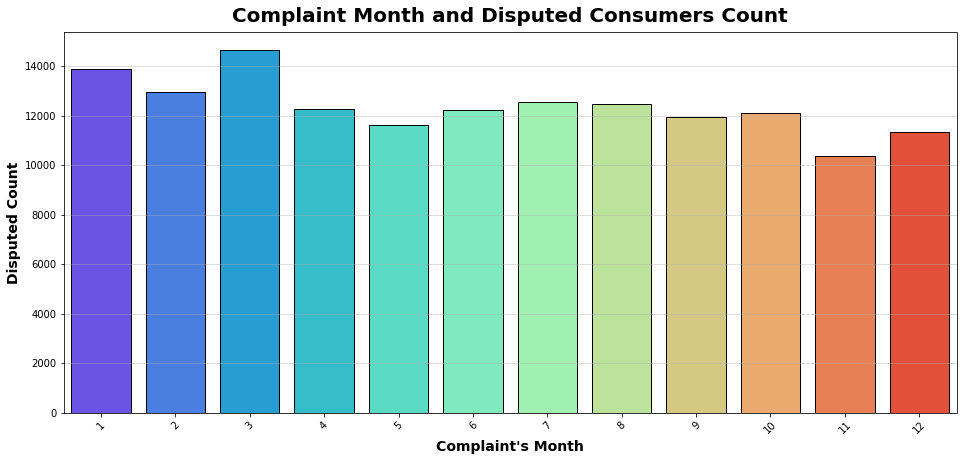

In [ ]:
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

plt.subplots(figsize=(16, 7))
sns.countplot(x='received_month', data=vis_df, ec="black", palette='rainbow')
plt.xticks(rotation=45)
plt.title('Complaint Month and Disputed Consumers Count', weight="bold", fontsize=20, pad=10)
plt.ylabel("Disputed Count", weight="bold", fontsize=14)
plt.xlabel("Complaint's Month", weight="bold", fontsize=14)
plt.grid(alpha=0.5, axis="y")
plt.show()

Complaint  submission

How the complaint was submitted to the CFPB. for example "Web" or "Phone"

In [ ]:
data.Submitted_via.value_counts(normalize=True).to_frame()*100

,proportion
Submitted_via,
Web,87.199787
Referral,5.893244
Phone,4.043561
Postal mail,2.200021
Fax,0.622938
Web Referral,0.030130
Email,0.010318


Text(0.5, 0, 'submitted via')

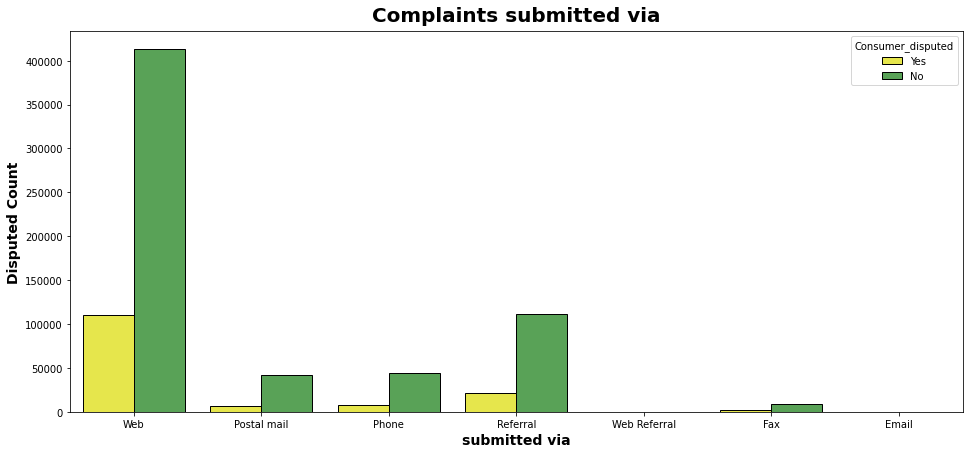

In [ ]:
plt.subplots(figsize=(16, 7))
sns.countplot(x='Submitted_via',hue="Consumer_disputed", data=data, ec="black", palette='Set1_r')

plt.title('Complaints submitted via', weight="bold", fontsize=20, pad=10)
plt.ylabel("Disputed Count", weight="bold", fontsize=14)
plt.xlabel("submitted via", weight="bold", fontsize=14)



Timely response has any effect on Target column

Text(0.5, 0, 'Timely response')

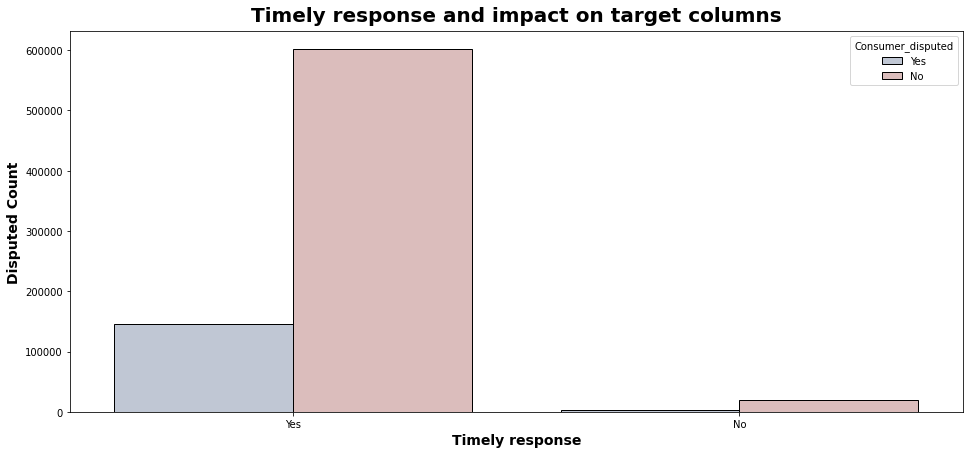

In [ ]:
plt.subplots(figsize=(16, 7))
sns.countplot(x='Timely_response',hue="Consumer_disputed", data=data, ec="black", palette='vlag')

plt.title('Timely response and impact on target columns', weight="bold", fontsize=20, pad=10)
plt.ylabel("Disputed Count", weight="bold", fontsize=14)
plt.xlabel("Timely response", weight="bold", fontsize=14)



COnsumer consent provided and its effect on Target column </br>
here consent provided column is approval given bt the consumer on publishing their complaints

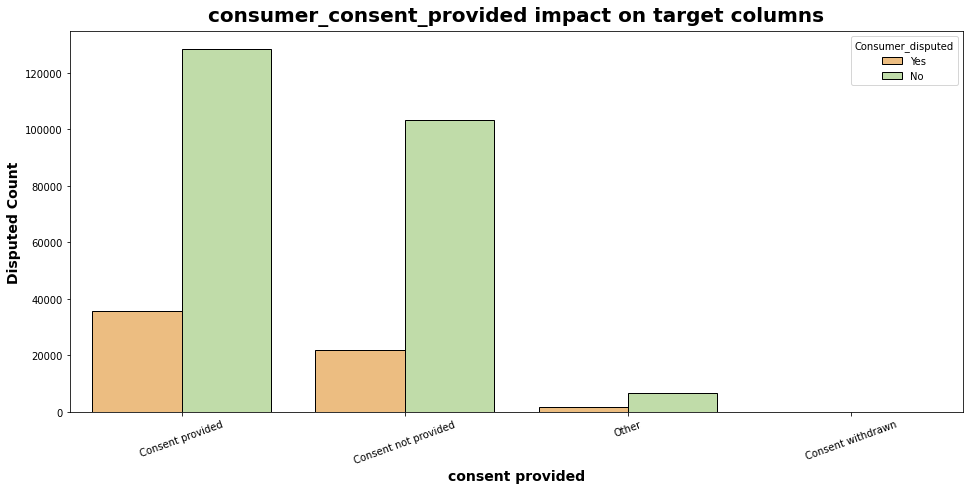

In [ ]:
plt.subplots(figsize=(16, 7))
sns.countplot(x='consumer_consent_provided',hue="Consumer_disputed", data=data, ec="black", palette='Spectral')

plt.title('consumer_consent_provided impact on target columns', weight="bold", fontsize=20, pad=10)
plt.ylabel("Disputed Count", weight="bold", fontsize=14)
plt.xlabel("consent provided", weight="bold", fontsize=14)
plt.xticks(rotation=20);